In [2]:

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/subs_q27 (1).csv')
df.head()

,text
0,"A huge thank you to all the musicians, those w..."
1,All great
2,although I was unable to attend all the Beetho...
3,Amazing and talented musicians. We're very luc...
4,Appalling response to Jayson Gillham’s simple ...


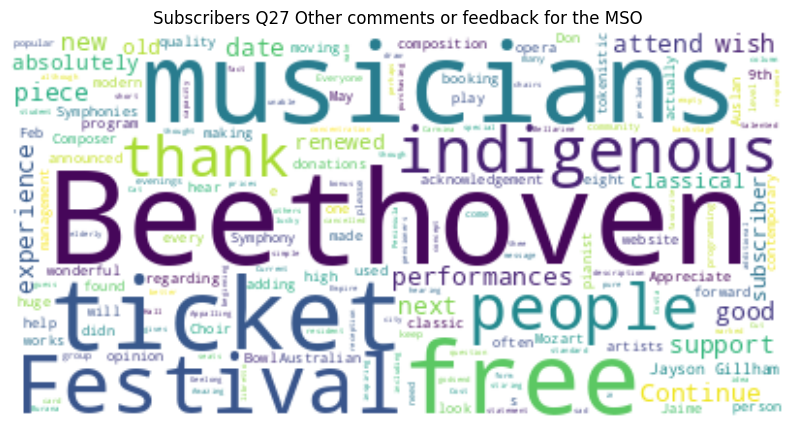

In [11]:
# Start with one review:
text = ' '.join(df.text.astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","love","loved","see","great","enjoy","time","think","years"])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Subscribers Q27 Other comments or feedback for the MSO")
plt.axis("off")
plt.show()

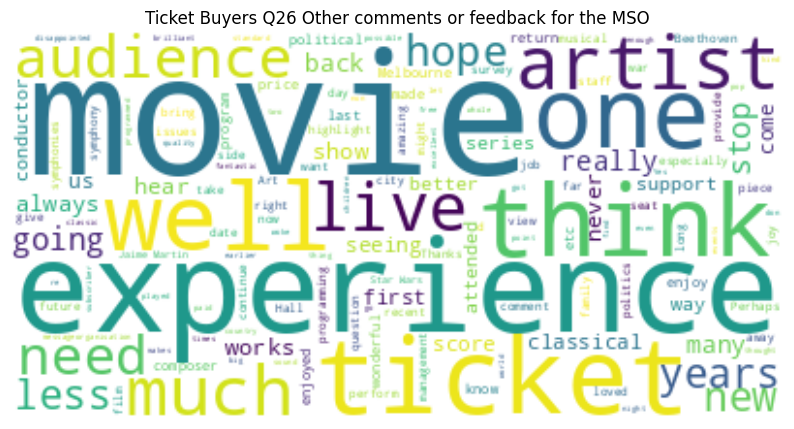

In [18]:
df = pd.read_csv('/content/single_Q26.csv')
text = ' '.join(df.text.astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","performance","s","keep","please","make","thank","performances", "great","love","see","people","musician","musicians","good","time","attend","will"])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Ticket Buyers Q26 Other comments or feedback for the MSO")
plt.axis("off")
plt.show()

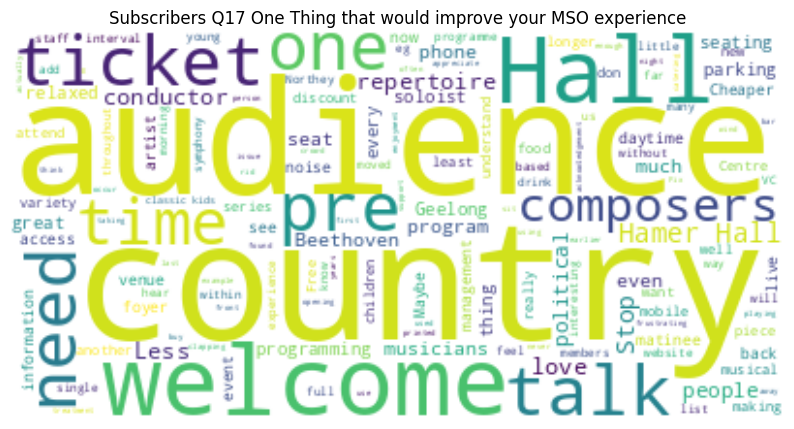

In [20]:
#subs what would improve MSO
df = pd.read_csv('/content/subs_improve.csv')
text = ' '.join(df.text.astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","performance","s","keep","please","make","thank","performances","better"])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Subscribers Q17 One Thing that would improve your MSO experience")
plt.axis("off")
plt.show()

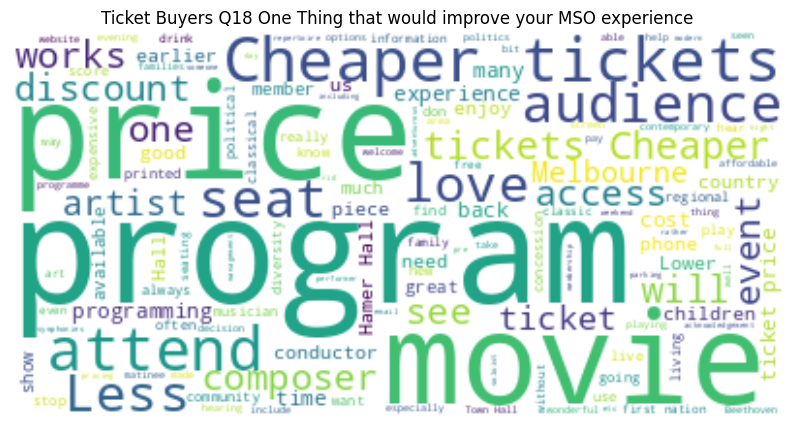

In [21]:
#single what would improve MSO
df = pd.read_csv('/content/single_improve.csv')
text = ' '.join(df.text.astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(["concert", "mso", "year", "orchestra", "music","concerts","subscription","work","t","performance","s","keep","please","make","thank","performances","better","people","go"])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords).generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Ticket Buyers Q18 One Thing that would improve your MSO experience")
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pickle
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')


# Step 1: Import Necessary Libraries and Load Data
df = pd.read_csv('/content/sentiment_train.csv')
df['text'] = df['text'].astype(str).apply(lambda x: x.lower())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Step 2: Preprocess the Data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens if token.isalpha()]
    return " ".join(tokens)
df['text'] = df['text'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['lable'], random_state=42, test_size=0.2, stratify=df['lable'])


In [ ]:
# Step 3: Feature Extraction
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [ ]:
# Step 4: Train an SVM Classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train_counts, y_train)
#with open('svm_model.pkl', 'wb') as f:
  #  pickle.dump(clf, f)
#loaded_clf = pickle.load(open('svm_model.pkl', 'rb'))

SVC(kernel='linear')

In [ ]:
# Step 5: Evaluate the Model
X_test_counts = vectorizer.transform(X_test)  # Transform X_test into numerical representation

y_pred = clf.predict(X_test_counts)  # Use the transformed data for prediction
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(cm)

Accuracy: 0.831
[[1226  298   32]
 [ 156 1977   91]
 [ 115  236 1366]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.79      0.80      1556
     neutral       0.79      0.89      0.84      2224
    positive       0.92      0.80      0.85      1717

    accuracy                           0.83      5497
   macro avg       0.84      0.82      0.83      5497
weighted avg       0.84      0.83      0.83      5497



In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_counts, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=  47.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=  41.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=  42.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=  42.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=  41.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.574 total time=  46.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.573 total time=  46.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.574 total time=  47.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=  46.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.569 total time=  45.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.405 total time=  50.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid_predictions = grid.predict(X_test_counts)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

    negative       0.82      0.80      0.81      1556
     neutral       0.79      0.88      0.83      2224
    positive       0.91      0.80      0.85      1717

    accuracy                           0.83      5497
   macro avg       0.84      0.83      0.83      5497
weighted avg       0.84      0.83      0.83      5497



In [ ]:
df_predict = pd.read_csv('/content/subs_q27.csv')
predict_text = df_predict['text'].astype(str).apply(lambda x: x.lower())
predict_text = df_predict['text'].apply(preprocess_text)

predict = vectorizer.transform(predict_text)




In [ ]:

prediction = grid.predict(predict)
df_predict['predictions'] = prediction
df_predict



,text,predictions
0,"A huge thank you to all the musicians, those w...",neutral
1,All great,positive
2,although I was unable to attend all the Beetho...,neutral
3,Amazing and talented musicians. We're very luc...,positive
4,Appalling response to Jayson Gillham’s simple ...,neutral
5,Appreciate the free bonus concerts but often s...,neutral
6,Appreciate the student ticket prices,positive
7,As an elderly resident of the Bellarine Penins...,neutral
8,As pensioners we do not have the capacity to m...,neutral
9,"Carmina Burana was my favourite, it was very s...",positive


In [ ]:

df_predict['predictions'] = prediction
df_predict


,text,predictions
0,"A huge thank you to all the musicians, those w...",neutral
1,All great,positive
2,although I was unable to attend all the Beetho...,neutral
3,Amazing and talented musicians. We're very luc...,positive
4,Appalling response to Jayson Gillham’s simple ...,neutral
5,Appreciate the free bonus concerts but often s...,neutral
6,Appreciate the student ticket prices,positive
7,As an elderly resident of the Bellarine Penins...,neutral
8,As pensioners we do not have the capacity to m...,neutral
9,"Carmina Burana was my favourite, it was very s...",positive


In [ ]:
import keras

In [ ]:
label_counts = df['lable'].value_counts()
print(label_counts)

lable
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


In [ ]:

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['lable'] == 'neutral']
df_minority = df[df['lable'] == 'negative']
df_middle = df[df['lable'] == 'positive']

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority, df_middle])

# Display new class counts
print(df_downsampled['lable'].value_counts())


lable
positive    8582
neutral     7781
negative    7781
Name: count, dtype: int64


In [ ]:
df_downsampled['text'] = df_downsampled['text'].astype(str).apply(lambda x: x.lower())
df_downsampled['text'] = df_downsampled['text'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df_downsampled['text'], df_downsampled['lable'], random_state=42, test_size=0.2, stratify=df_downsampled['lable'])

vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
clf = svm.SVC(C=10, gamma=0.1, kernel='rbf' )
clf.fit(X_train_counts, y_train)

SVC(C=10, gamma=0.1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [ 10 ],
              'gamma': [0.07,0.08,0.09],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_counts, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ......C=10, gamma=0.07, kernel=rbf;, score=0.826 total time=  22.4s
[CV 2/5] END ......C=10, gamma=0.07, kernel=rbf;, score=0.826 total time=  21.5s
[CV 3/5] END ......C=10, gamma=0.07, kernel=rbf;, score=0.821 total time=  22.3s
[CV 4/5] END ......C=10, gamma=0.07, kernel=rbf;, score=0.831 total time=  21.9s
[CV 5/5] END ......C=10, gamma=0.07, kernel=rbf;, score=0.811 total time=  21.5s
[CV 1/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.824 total time=  22.2s
[CV 2/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.826 total time=  22.5s
[CV 3/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.820 total time=  22.3s
[CV 4/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.828 total time=  22.2s


KeyboardInterrupt: 

In [ ]:
#X_test_counts = vectorizer.transform(X_test)  # Transform X_test into numerical representation
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test_counts)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      1556
     neutral       0.77      0.86      0.81      1556
    positive       0.91      0.81      0.86      1717

    accuracy                           0.83      4829
   macro avg       0.84      0.83      0.83      4829
weighted avg       0.84      0.83      0.83      4829



In [ ]:
# prompt: save clf model using pickle

import pickle

# ... (Your existing code) ...

# Save the trained model
#with open('svm_model.pkl', 'wb') as f:
  #  pickle.dump(clf, f)

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [ ]:
prediction = clf.predict(predict)
df_predict['predictions'] = prediction
df_predict

,text,predictions
0,"A huge thank you to all the musicians, those w...",negative
1,All great,positive
2,although I was unable to attend all the Beetho...,neutral
3,Amazing and talented musicians. We're very luc...,positive
4,Appalling response to Jayson Gillham’s simple ...,negative
5,Appreciate the free bonus concerts but often s...,negative
6,Appreciate the student ticket prices,negative
7,As an elderly resident of the Bellarine Penins...,negative
8,As pensioners we do not have the capacity to m...,positive
9,"Carmina Burana was my favourite, it was very s...",negative


In [ ]:
df_survey = pd.read_csv('/content/survey.csv')
df_survey['text'] = df_survey['text'].astype(str).apply(lambda x: x.lower())
predict_text = df_survey['text'].astype(str).apply(lambda x: x.lower())
predict_text = df_survey['text'].apply(preprocess_text)

predict = vectorizer.transform(predict_text)

In [ ]:
loaded_model = pickle.load(open('/content/svm_model.pkl', 'rb'))

In [ ]:
prediction = loaded_model.predict(predict)
df_survey['label'] = prediction
df_survey

,text,category,label
0,"a huge thank you to all the musicians, those w...",other,neutral
1,and a special thank you to jaime!,Brand,positive
2,all great,brand,positive
3,although i was unable to attend all the beetho...,Programming and concert format,neutral
4,amazing and talented musicians. we're very luc...,brand,positive
...,...,...,...
977,we need video game music themed concerts,Programming and concert format,neutral
978,"where possible or appropriate, live snippets o...",Programming and concert format,neutral
979,would like better accessibility to programs pr...,Programming and concert format,neutral
980,would like to see more mso's engagement with s...,brand,neutral


In [ ]:
df_survey['label'].value_counts()

,count
label,
neutral,677
positive,169
negative,136


In [ ]:
df_survey.to_csv('/content/survey_results.csv')